In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [2]:
import tensorflow as tf
print(tf.__version__)

2.1.0


In [0]:
import numpy as np
import pandas as pd

from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, BatchNormalization, MaxPooling2D
from tensorflow.keras.models import Model

In [4]:
#load data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train,x_test = x_train/255.0,x_test/255.0
print(y_train.shape)
y_train, y_test = y_train.flatten(),y_test.flatten()
print(x_train.shape)
print(y_train.shape)

170500096/170498071 [==============================] - 4s 0us/step
(50000, 1)
(50000, 32, 32, 3)
(50000,)


In [5]:
#number of class
k = len(set(y_train))
print("number of class",k)

number of class 10


In [0]:
#building model using keras functional api
i = Input(shape=x_train[0].shape)
x = Conv2D(32,(3,3),  activation="relu", padding="same" )(i)
x = BatchNormalization()(x)
x = Conv2D(32,(3,3),  activation="relu", padding="same" )(i)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(64, (3,3), activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = Conv2D(64, (3,3), activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
# x = Dropout(0.2)(x)
x = Conv2D(128, (3,3),  activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = Conv2D(128, (3,3),  activation="relu", padding="same")(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
# x = Dropout(0.2)(x)
# x = GlobalMaxPooling2D()(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.2)(x)
x = Dense(k, activation="softmax")(x)

model = Model(i, x)

In [0]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])


In [0]:
#try checking without data augmentation below
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=25)

In [16]:
#fitting with data augmentation
# running it after above fit function, it will run the training where previous fit model.fit() left off
batch_size = 32
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, horizontal_flip=True)
train_generator = data_generator.flow(x_train, y_train, batch_size)
steps_per_epoch = x_train.shape[0] // batch_size
r = model.fit_generator(train_generator, validation_data=(x_test, y_test), steps_per_epoch=steps_per_epoch, epochs=50)

Instructions for updating:
Please use Model.fit, which supports generators.
  ...
    to  
  ['...']
Train for 1562 steps, validate on 10000 samples
Epoch 1/50
1562/1562 [==============================] - 26s 17ms/step - loss: 1.4811 - accuracy: 0.4813 - val_loss: 1.0093 - val_accuracy: 0.6408
Epoch 2/50
1562/1562 [==============================] - 26s 17ms/step - loss: 1.0878 - accuracy: 0.6166 - val_loss: 1.1896 - val_accuracy: 0.6196
Epoch 3/50
1562/1562 [==============================] - 26s 17ms/step - loss: 0.9302 - accuracy: 0.6763 - val_loss: 1.0627 - val_accuracy: 0.6416
Epoch 4/50
1562/1562 [==============================] - 26s 17ms/step - loss: 0.8405 - accuracy: 0.7089 - val_loss: 0.7229 - val_accuracy: 0.7539
Epoch 5/50
1562/1562 [==============================] - 26s 17ms/step - loss: 0.7629 - accuracy: 0.7390 - val_loss: 0.9307 - val_accuracy: 0.6987
Epoch 6/50
1562/1562 [==============================] - 26s 17ms/step - loss: 0.7131 - accuracy: 0.7534 - val_loss: 0.699

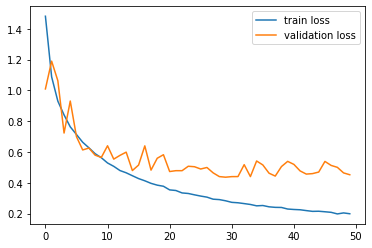

In [17]:
import matplotlib.pyplot as plt

plt.plot(r.history["loss"], label="train loss")
plt.plot(r.history["val_loss"], label="validation loss")
plt.legend()
plt.show()

Confusion matrix, without normalization
[[930   8  27   4   2   1   1   1  17   9]
 [ 15 947   0   0   0   1   1   0   7  29]
 [ 46   2 830  36  25  24  14  11   6   6]
 [ 39   4  52 684  27 112  30  22  13  17]
 [ 23   2  42  23 840  29  12  25   3   1]
 [ 10   3  25  81  21 825   6  23   1   5]
 [ 11   4  33  27  15  15 870   4   9  12]
 [ 15   1  16  10  20  26   2 903   2   5]
 [ 58  16   3   3   0   0   1   0 910   9]
 [ 19  63   2   3   1   1   0   2   8 901]]


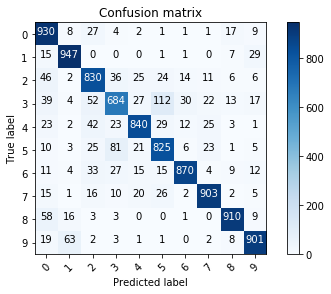

In [18]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))



In [0]:
# Label mapping
# label mapping
labels = '''airplane
automobile
bird
cat
deer
dog
frog
horse
ship
truck'''.split()

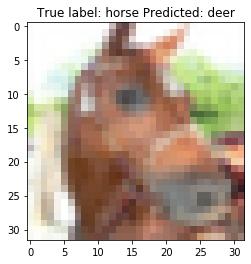

In [20]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

In [21]:
#summary of model
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_9 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
batch_normalization_10 (Batc (None, 16, 16, 64)        256       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 16, 16, 64)        3692